In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def forward(x,w,b):
        a=x.dot(w)+b
        #apply the softmax
        expa=np.exp(a)
        y=expa/expa.sum(axis=1,keepdims=True)
        return y

In [3]:
def y2indicator(y):
    n=len(y)
    y=y.astype(np.int32)
    k=y.max()+1
    ind=np.zeros((n,k))
    for n in range(n):
        k=y[n]
        ind[n,k]=1
    return ind

In [4]:
def cost(y_pred,y_true):
    tot=y_true*np.log(y_pred)
    return -tot.sum()

In [5]:
def predict(y_pred):
    return np.argmax(y_pred,axis=1)

In [6]:
def error_rate(y_pred,y_true):
    prediction=predict(y_pred)
    return np.mean(prediction!= y_true)

In [7]:
#this calculated the gradient of the weights
def gradw(y_true,y_pred,X):
    return X.T.dot(y_true-y_pred)

In [8]:
#this calculates the gradient of the biases
def gradb(y_true,y_pred):
    return (y_true-y_pred).sum(axis=0)

In [9]:
def linear_regression():
    df=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
    data=df.values.astype(np.float32)
    np.random.shuffle(data)
    
    x=data[:,1:]
    y=data[:,0]

    x_train=x[:-10000]
    y_train=y[:-10000]
    x_test=x[-10000:]
    y_test=y[-10000:]
    
    #lets standardize the inputs
    ytrain_ind=y2indicator(y_train)
    ytest_ind=y2indicator(y_test)
    
    #lets get the input shape
    N,D=x_train.shape
    
    #number of columns for indicator matrix
    K=ytrain_ind.shape[1]
    
    #lets initialize the variables
    W=np.random.randn(D,K)/np.sqrt(D)
    b=np.zeros(K)

    train_losses=[]
    test_losses=[]
    train_classification_error=[]
    test_classification_error=[]

    lr=0.00003
    reg=0.00004
    n_iter=100

    for i in range(n_iter):
        
        y_pred_train=forward(x_train,W,b)
        train_loss=cost(y_pred_train,ytrain_ind)
        train_losses.append(train_loss)

        train_err=error_rate(y_pred_train,y_train)
        train_classification_error.append(train_err)

        #lets do the previous operation for the testing set
        y_pred_test=forward(x_test,W,b)
        test_loss=cost(y_pred_test,ytest_ind)
        train_losses.append(test_loss)

        test_err=error_rate(y_pred_test,y_test)
        test_classification_error.append(test_err)

        #lets upgrade the weight and the bias of the network
        W+=lr*(gradw(ytrain_ind,y_pred_train,x_train)-reg*W)  #this assumes that gradient assent and gradient decent are the same
        b+=lr*gradb(ytrain_ind,y_pred_train)
    y_pred=forward(x_test,W,b)
    print("final error rate:",error_rate(y_pred,y_test))
    plt.plot(train_losses,label="train loss")
    plt.plot(test_losses,label="test loss")
    plt.title("classification error per iteration")
    plt.legend()
    plt.show()


/tmp/ipykernel_20/2552119205.py:4: RuntimeWarning: overflow encountered in exp
  expa=np.exp(a)
/tmp/ipykernel_20/2552119205.py:5: RuntimeWarning: invalid value encountered in divide
  y=expa/expa.sum(axis=1,keepdims=True)
/tmp/ipykernel_20/563414472.py:2: RuntimeWarning: divide by zero encountered in log
  tot=y_true*np.log(y_pred)
/tmp/ipykernel_20/563414472.py:2: RuntimeWarning: invalid value encountered in multiply
  tot=y_true*np.log(y_pred)


final error rate: 0.9014


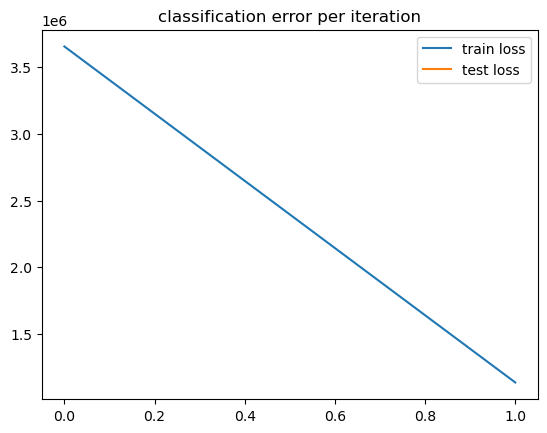

In [10]:
linear_regression()